**Load packages:**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

**Load dataset and EDA (Explore dataset analysis):**

In [10]:
df = pd.read_csv('./iemocap_full_dataset.csv')

In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df.head()

,start_time,end_time,wav_file,emotion,val,act,dom,rms_mean,rms_std,pitch_tuning_offset,...,delta2_mfccs_4,delta2_mfccs_5,delta2_mfccs_6,delta2_mfccs_7,delta2_mfccs_8,delta2_mfccs_9,delta2_mfccs_10,delta2_mfccs_11,delta2_mfccs_12,delta2_mfccs_13
0,10.0461,13.35,Ses05F_script03_2_F000,neu,2.5,3.0,3.0,0.005157,0.005294,0.02,...,-28.476913,-28.476913,7.302598,-0.814701,2.111410,-0.739752,-0.739752,-0.739752,-0.739752,-0.739752
1,15.6000,18.02,Ses05F_script03_2_F001,neu,2.0,3.0,3.5,0.007110,0.005555,0.15,...,-26.946152,-26.946152,7.526997,-0.821007,2.434876,-1.338955,-1.338955,-1.338955,-1.338955,-1.338955
2,20.0400,23.71,Ses05F_script03_2_F002,xxx,2.5,3.0,3.5,0.011829,0.008356,0.10,...,-21.694258,-21.694258,8.228289,-2.179932,1.598578,-2.023334,-2.023334,-2.023334,-2.023334,-2.023334
3,26.4100,29.53,Ses05F_script03_2_F003,neu,2.5,3.0,3.5,0.006859,0.005226,0.29,...,-28.333923,-28.333923,7.885607,-0.190706,2.339851,-1.220446,-1.220446,-1.220446,-1.220446,-1.220446
4,31.9500,34.54,Ses05F_script03_2_F004,neu,2.5,2.5,3.0,0.004843,0.004312,-0.10,...,-28.867025,-28.867025,8.730533,-0.459567,2.175327,-1.455357,-1.455357,-1.455357,-1.455357,-1.455357


In [13]:
df.shape

(10033, 54)

<a name='load_data'></a>

### Dataset Preprocessing

In [14]:
df['emotion'].value_counts()

xxx    2505
fru    1847
neu    1708
ang    1101
sad    1084
exc    1041
hap     595
sur     107
fea      40
oth       3
dis       2
Name: emotion, dtype: int64

In [15]:
# Only keep rows with emotions == neu, ang, sad, hap

def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

# New dataframe. Imbalanced dataset
df_new = filter_rows_by_values(df, "emotion", ["fru", "exc", "sur", "fea", "xxx", "oth", "dis"])
df_new['emotion'].value_counts()

neu    1708
ang    1101
sad    1084
hap     595
Name: emotion, dtype: int64

In [16]:
df_new.shape

(4488, 54)

In [17]:
# Map emotions to numbers  

df_new = df_new.assign(targetColumn = 0)

df_new.loc[(df_new['emotion'] == 'neu'), 'targetColumn'] = '1'  # neutral state
df_new.loc[(df_new['emotion'] == 'ang'), 'targetColumn'] = '2'  # anger
df_new.loc[(df_new['emotion'] == 'sad'), 'targetColumn'] = '3'  # sadness
df_new.loc[(df_new['emotion'] == 'hap'), 'targetColumn'] = '4'  # happiness


In [18]:
# Shift the 'label' column ahead for better visualization.

label = df_new.pop('targetColumn')
df_new.insert(4, 'targetColumn', label)
df_new.head()

,start_time,end_time,wav_file,emotion,targetColumn,val,act,dom,rms_mean,rms_std,...,delta2_mfccs_4,delta2_mfccs_5,delta2_mfccs_6,delta2_mfccs_7,delta2_mfccs_8,delta2_mfccs_9,delta2_mfccs_10,delta2_mfccs_11,delta2_mfccs_12,delta2_mfccs_13
0,10.0461,13.35,Ses05F_script03_2_F000,neu,1,2.5,3.0,3.0,0.005157,0.005294,...,-28.476913,-28.476913,7.302598,-0.814701,2.111410,-0.739752,-0.739752,-0.739752,-0.739752,-0.739752
1,15.6000,18.02,Ses05F_script03_2_F001,neu,1,2.0,3.0,3.5,0.007110,0.005555,...,-26.946152,-26.946152,7.526997,-0.821007,2.434876,-1.338955,-1.338955,-1.338955,-1.338955,-1.338955
3,26.4100,29.53,Ses05F_script03_2_F003,neu,1,2.5,3.0,3.5,0.006859,0.005226,...,-28.333923,-28.333923,7.885607,-0.190706,2.339851,-1.220446,-1.220446,-1.220446,-1.220446,-1.220446
4,31.9500,34.54,Ses05F_script03_2_F004,neu,1,2.5,2.5,3.0,0.004843,0.004312,...,-28.867025,-28.867025,8.730533,-0.459567,2.175327,-1.455357,-1.455357,-1.455357,-1.455357,-1.455357
5,36.6100,38.22,Ses05F_script03_2_F005,neu,1,2.5,4.0,3.0,0.008226,0.009976,...,-26.964447,-26.964447,8.505190,-1.289738,1.965385,-1.043562,-1.043562,-1.043562,-1.043562,-1.043562


In [19]:
# Normalize all numerical columns in the dataset

num_cols = list(df_new.select_dtypes(include=[np.number]).columns.values)
num_cols.remove('start_time')
num_cols.remove('end_time')
num_cols.remove('val')
num_cols.remove('act')
num_cols.remove('dom')

normalized_df = df_new.copy()
normalized_df[num_cols] = (df_new[num_cols]-df_new[num_cols].min())/(df_new[num_cols].max() - df_new[num_cols].min())

# Change to a shorter name
df1 = normalized_df
df1.head()

,start_time,end_time,wav_file,emotion,targetColumn,val,act,dom,rms_mean,rms_std,...,delta2_mfccs_4,delta2_mfccs_5,delta2_mfccs_6,delta2_mfccs_7,delta2_mfccs_8,delta2_mfccs_9,delta2_mfccs_10,delta2_mfccs_11,delta2_mfccs_12,delta2_mfccs_13
0,10.0461,13.35,Ses05F_script03_2_F000,neu,1,2.5,3.0,3.0,0.012617,0.029811,...,0.228881,0.228881,0.499970,0.532230,0.311359,0.457265,0.457265,0.457265,0.457265,0.457265
1,15.6000,18.02,Ses05F_script03_2_F001,neu,1,2.0,3.0,3.5,0.018178,0.031307,...,0.269572,0.269572,0.528107,0.531095,0.356869,0.347872,0.347872,0.347872,0.347872,0.347872
3,26.4100,29.53,Ses05F_script03_2_F003,neu,1,2.5,3.0,3.5,0.017462,0.029418,...,0.232682,0.232682,0.573072,0.644547,0.343500,0.369507,0.369507,0.369507,0.369507,0.369507
4,31.9500,34.54,Ses05F_script03_2_F004,neu,1,2.5,2.5,3.0,0.011720,0.024182,...,0.218511,0.218511,0.679014,0.596153,0.320352,0.326621,0.326621,0.326621,0.326621,0.326621
5,36.6100,38.22,Ses05F_script03_2_F005,neu,1,2.5,4.0,3.0,0.021355,0.056647,...,0.269086,0.269086,0.650759,0.446724,0.290814,0.401800,0.401800,0.401800,0.401800,0.401800


In [20]:
df1.shape

(4488, 55)

<a name='Train'></a>

### 1.1 Model Training for classification without feature selection

In [21]:
from sklearn.model_selection import train_test_split

X = df1.iloc[:,8:]
y = df1.iloc[:,4]

# Splitting the data into train and test sets after shuffling
# 80% 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [23]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

def cross_validate(num_splits, X, Y, model):

  kf = KFold(n_splits=num_splits, shuffle= True, random_state=0)
  score_list = []

  for train_idx, test_idx in kf.split(X, Y):
    x_train = X.iloc[train_idx]
    y_train = Y.iloc[train_idx]

    x_test = X.iloc[test_idx]
    y_test = Y.iloc[test_idx]

    model.fit(x_train, y_train) #Training the model
    
    #Making Predictions
    y_pred = model.predict(x_test)

    #f1-score
    report = classification_report(y_test, y_pred, output_dict=True)
    score_list.append(report['macro avg']['f1-score'])
    
  return score_list

<a name='Logistic regression'></a>

#### 1.1.1 Logistic Regression

In [ ]:
#Logistic Regression with Linear Features

from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to training set
log = LogisticRegression(penalty='none', solver='saga', random_state=0)
log.fit(X_train, y_train)

# Making predictions
y_train_pred_log = log.predict(X_train) #Training set
y_test_pred_log = log.predict(X_test) #Test set

In [ ]:
# Save the model
import pickle

filename = 'logistic_regression.pkl'
pickle.dump(log, open(filename, 'wb'))

In [ ]:
# Calculating F1-scores
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_results(model, y_true, y_pred):
    # classification report 
    report = classification_report(y_true, y_pred)
    print("Classification report: \n", report)

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=model.classes_)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp_cm.plot()

Classification report: 
               precision    recall  f1-score   support

           1       0.57      0.70      0.63      1366
           2       0.69      0.67      0.68       884
           3       0.62      0.70      0.66       863
           4       0.48      0.06      0.11       477

    accuracy                           0.61      3590
   macro avg       0.59      0.54      0.52      3590
weighted avg       0.60      0.61      0.58      3590



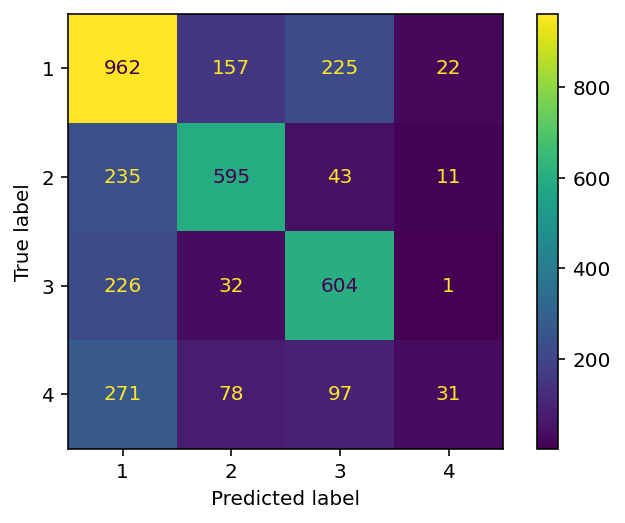

In [ ]:
# Train data:
get_results(log, y_train, y_train_pred_log)

Classification report: 
               precision    recall  f1-score   support

           1       0.55      0.68      0.61       342
           2       0.67      0.65      0.66       217
           3       0.58      0.66      0.61       221
           4       0.57      0.07      0.12       118

    accuracy                           0.59       898
   macro avg       0.59      0.51      0.50       898
weighted avg       0.59      0.59      0.56       898



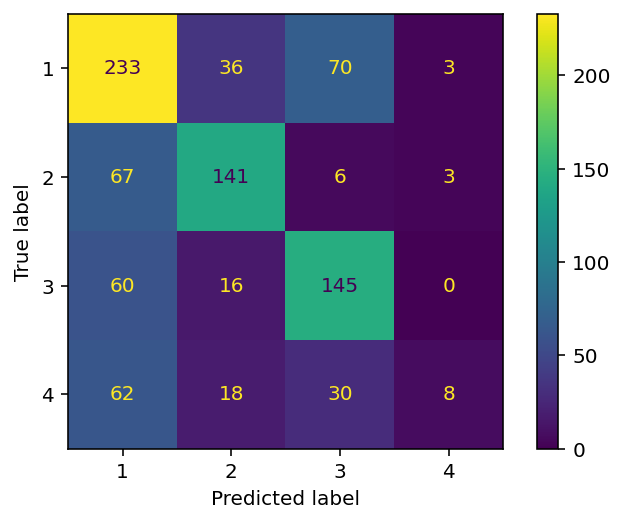

In [ ]:
# Test data:
get_results(log, y_test, y_test_pred_log)

In [ ]:
# Cross validation
cv_log = cross_validate(5, X, y, log)
print("Macro Average f1-score for each fold of Logistic Regression Model: ",cv_log)
print("Average Score: ",np.mean(cv_log))

Macro Average f1-score for each fold of Logistic Regression Model:  [0.5011112623812732, 0.5114656383154513, 0.49633328963598833, 0.5207355724641911, 0.48814586104091995]
Average Score:  0.5035583247675648


<a name='MultinomialNB'></a>

#### 1.1.2 MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Fitting MultinomialNB to training set
MNBclf = MultinomialNB(alpha = 1.0, fit_prior = True, class_prior = [3, 2, 2, 1])
MNBclf.fit(X_train, y_train)

# Making predictions
y_train_pred_mnb = MNBclf.predict(X_train) #Training set
y_test_pred_mnb = MNBclf.predict(X_test) #Test set

In [ ]:
# Save the model

filename = 'MultinomialNB.pkl'
pickle.dump(log, open(filename, 'wb'))

Classification report: 
               precision    recall  f1-score   support

           1       0.47      0.82      0.59      1366
           2       0.65      0.45      0.53       884
           3       0.65      0.44      0.53       863
           4       0.00      0.00      0.00       477

    accuracy                           0.53      3590
   macro avg       0.44      0.43      0.41      3590
weighted avg       0.49      0.53      0.48      3590



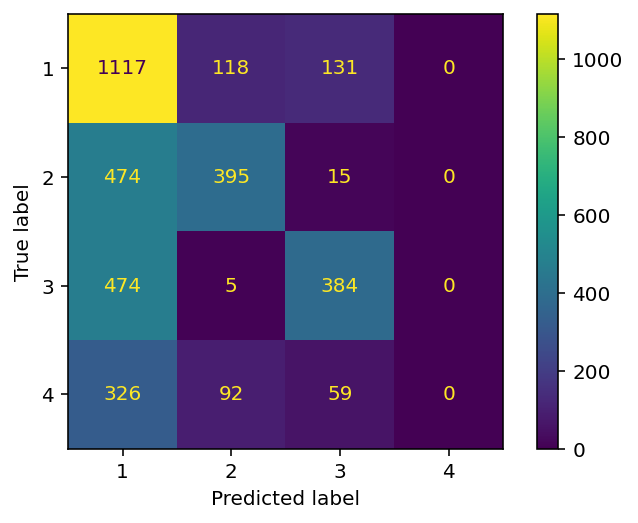

In [ ]:
# Train data:
get_results(MNBclf, y_train, y_train_pred_mnb)

Classification report: 
               precision    recall  f1-score   support

           1       0.47      0.82      0.60       342
           2       0.70      0.45      0.55       217
           3       0.59      0.43      0.50       221
           4       0.00      0.00      0.00       118

    accuracy                           0.53       898
   macro avg       0.44      0.43      0.41       898
weighted avg       0.49      0.53      0.48       898



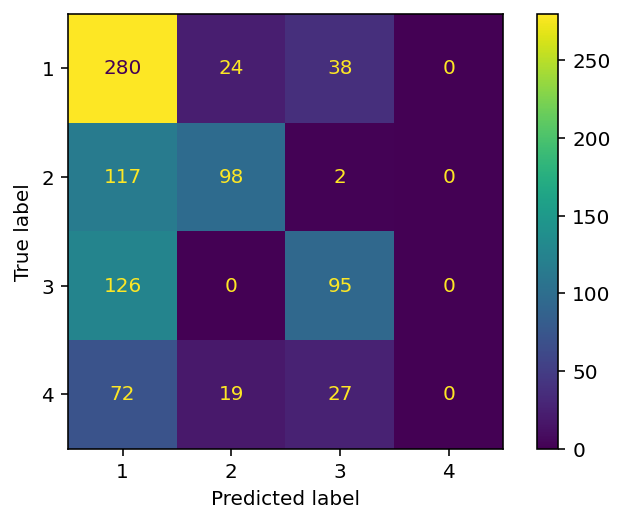

In [ ]:
# Test data:
get_results(MNBclf, y_test, y_test_pred_mnb)

In [ ]:
# Cross validation
cv_mnb = cross_validate(5, X, y, MNBclf)
print("Macro Average f1-score for each fold of Multinomial Naive Bayes Model: ",cv_mnb)
print("Average Score: ",np.mean(cv_mnb))

Macro Average f1-score for each fold of Multinomial Naive Bayes Model:  [0.41030541638582907, 0.4085466872690494, 0.3912957988094626, 0.4299244446364042, 0.41846516496178976]
Average Score:  0.4117075024125071


<a name='MultinomialNB'></a>

#### 1.1.3 RandomForestClassifier

In [ ]:
#Use GridSearch to fine tune model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
tune_paragm = {
    'n_estimators': [10, 15],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [2, 3, 5]
}
rf_gdcv = GridSearchCV(rf, tune_paragm, n_jobs=-1, cv=5, scoring='f1_macro')
rf_gdcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 15]},
             scoring='f1_macro')

In [ ]:
# Get the best parameters
rf_gdcv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 10}

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0)
rf.fit(X_train, y_train)
# Making predictions 
y_train_pred_rf = rf.predict(X_train) #Training set
y_test_pred_rf = rf.predict(X_test) #Test set

In [ ]:
# Save the model

filename = 'randomforest.pkl'
pickle.dump(log, open(filename, 'wb'))

Classification report: 
               precision    recall  f1-score   support

           1       0.56      0.76      0.64      1366
           2       0.71      0.66      0.69       884
           3       0.64      0.67      0.66       863
           4       1.00      0.02      0.04       477

    accuracy                           0.62      3590
   macro avg       0.73      0.53      0.51      3590
weighted avg       0.68      0.62      0.58      3590



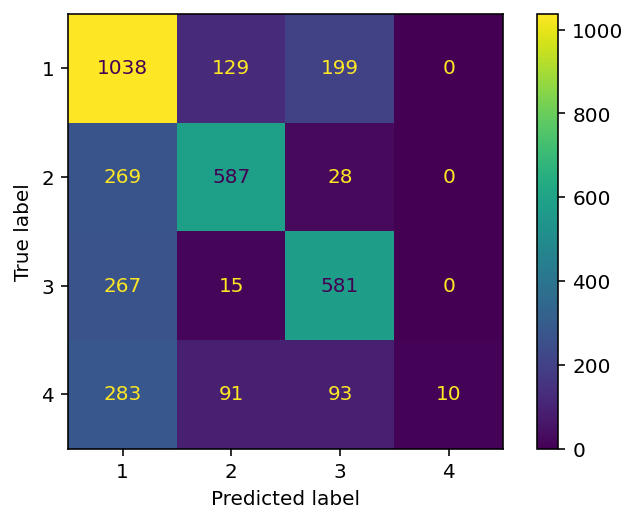

In [ ]:
# Train data:
get_results(rf, y_train, y_train_pred_rf)

Classification report: 
               precision    recall  f1-score   support

           1       0.53      0.75      0.62       342
           2       0.71      0.63      0.67       217
           3       0.60      0.59      0.59       221
           4       0.00      0.00      0.00       118

    accuracy                           0.58       898
   macro avg       0.46      0.49      0.47       898
weighted avg       0.52      0.58      0.54       898



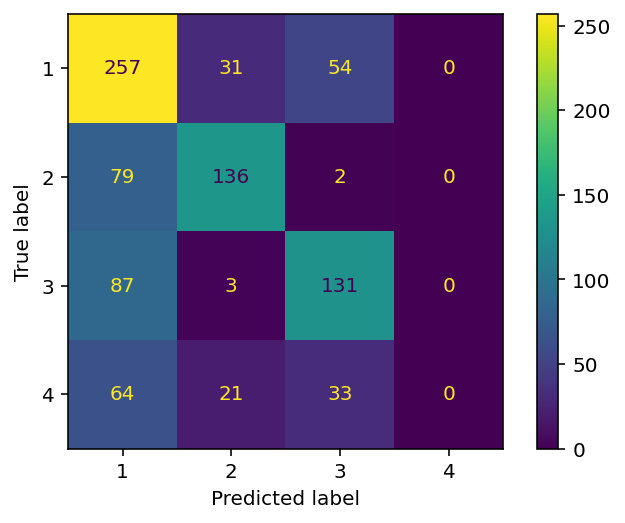

In [ ]:
# Test data:
get_results(rf, y_test, y_test_pred_rf)

In [ ]:
# Cross validation
cv_rf = cross_validate(5, X, y, rf)
print("Macro Average f1-score for each fold of RandomForest Classifier Model: ",cv_rf)
print("Average Score: ",np.mean(cv_rf))

Macro Average f1-score for each fold of RandomForest Classifier Model:  [0.4725216932339046, 0.4647311526543758, 0.4388723625620828, 0.4884284231845437, 0.4734451815525438]
Average Score:  0.4675997626374901


<a name='Train'></a>

### 1.2 Model Training for classification with feature selection

 Use Filter method to perform feature selection

In [ ]:
X_train.shape

(3590, 47)

In [ ]:
# Removing Constant features using VarianceThreshold

from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
constant_filter.fit_transform(X_train)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X_train.columns
                   if column not in X_train.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))
print(f'{len(constant_columns)} quasi-constant features were found.')


0
0 quasi-constant features were found.


In [ ]:
# Removing Quasi-Constant Features

qcons_filter = VarianceThreshold(threshold=0.01)

#Fitand transforming on train data
data_qcons = qcons_filter.fit_transform(X_train)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in X_train.columns
                    if column not in X_train.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(f'{len(qcons_columns)} quasi-constant features were found.')

#Removing identified quasi-constant columns
X_train1 = X_train.drop(qcons_columns,axis=1)
X_test1 = X_test.drop(qcons_columns,axis=1)
print(X_train1.shape)
print(X_test1.shape)

4 quasi-constant features were found.
(3590, 43)
(898, 43)


In [ ]:
# feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def select_features(X_train, y_train, X_test, num):
	# configure to select "num" features
	fs = SelectKBest(score_func=f_classif, k=num)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

<a name='Logistic regression'></a>

#### 1.2.1 Logistic Regression

In [ ]:
# Select K best features, change "num" to get the best results.
X_train_log, X_test_log, fs_log = select_features(X_train1, y_train, X_test1, 25)

In [ ]:
# Fitting Logistic Regression to training set
log_filter = LogisticRegression(penalty='none', solver='saga', random_state=0)
log_filter.fit(X_train_log, y_train)

# Making predictions
y_train_pred_log_filter = log_filter.predict(X_train_log) #Training set
y_test_pred_log_filter = log_filter.predict(X_test_log) #Test set

Classification report: 
               precision    recall  f1-score   support

           1       0.54      0.68      0.61      1366
           2       0.67      0.66      0.66       884
           3       0.57      0.63      0.60       863
           4       0.50      0.04      0.07       477

    accuracy                           0.58      3590
   macro avg       0.57      0.50      0.48      3590
weighted avg       0.57      0.58      0.55      3590



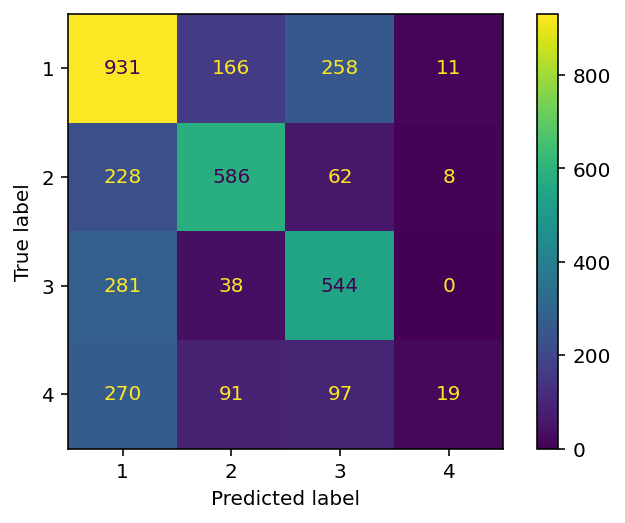

In [ ]:
# Train data:
get_results(log_filter, y_train, y_train_pred_log_filter)

Classification report: 
               precision    recall  f1-score   support

           1       0.51      0.64      0.57       342
           2       0.64      0.63      0.63       217
           3       0.53      0.58      0.55       221
           4       0.20      0.02      0.03       118

    accuracy                           0.54       898
   macro avg       0.47      0.47      0.45       898
weighted avg       0.50      0.54      0.51       898



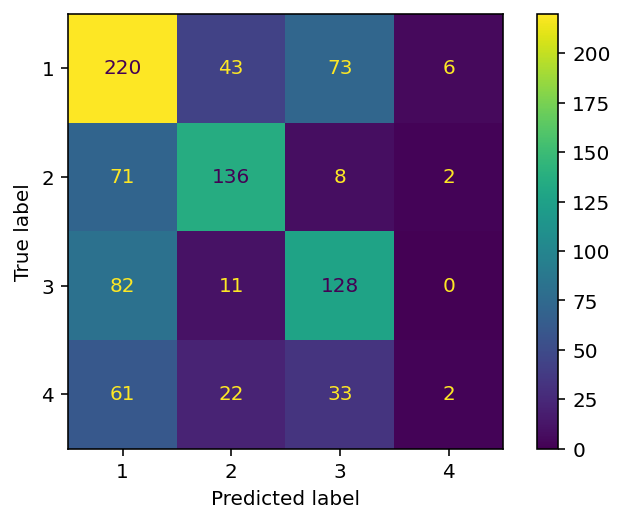

In [ ]:
# Test data:
get_results(log_filter, y_test, y_test_pred_log_filter)

<a name='MultinomialNB'></a>

#### 1.2.2 MultinomialNB

In [ ]:
# Select K best features, change "num" to get the best results.
X_train_mnb, X_test_mnb, fs_mnb = select_features(X_train1, y_train, X_test1, 40)

In [ ]:
# Fitting MultinomialNB to training set
MNBclf_filter = MultinomialNB(alpha = 1.0, fit_prior = True, class_prior = [3, 2, 2, 1])
MNBclf_filter.fit(X_train_mnb, y_train)

# Making predictions
y_train_pred_mnb_filter = MNBclf_filter.predict(X_train_mnb) #Training set
y_test_pred_mnb_filter = MNBclf_filter.predict(X_test_mnb) #Test set

Classification report: 
               precision    recall  f1-score   support

           1       0.47      0.84      0.60      1366
           2       0.65      0.44      0.52       884
           3       0.67      0.42      0.51       863
           4       0.00      0.00      0.00       477

    accuracy                           0.53      3590
   macro avg       0.45      0.42      0.41      3590
weighted avg       0.50      0.53      0.48      3590



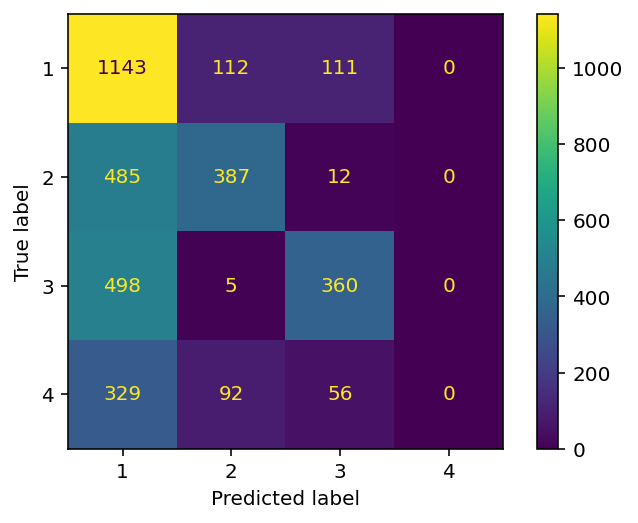

In [ ]:
# Train data:
get_results(MNBclf_filter, y_train, y_train_pred_mnb_filter)

Classification report: 
               precision    recall  f1-score   support

           1       0.46      0.84      0.60       342
           2       0.71      0.46      0.56       217
           3       0.58      0.37      0.45       221
           4       0.00      0.00      0.00       118

    accuracy                           0.52       898
   macro avg       0.44      0.42      0.40       898
weighted avg       0.49      0.52      0.47       898



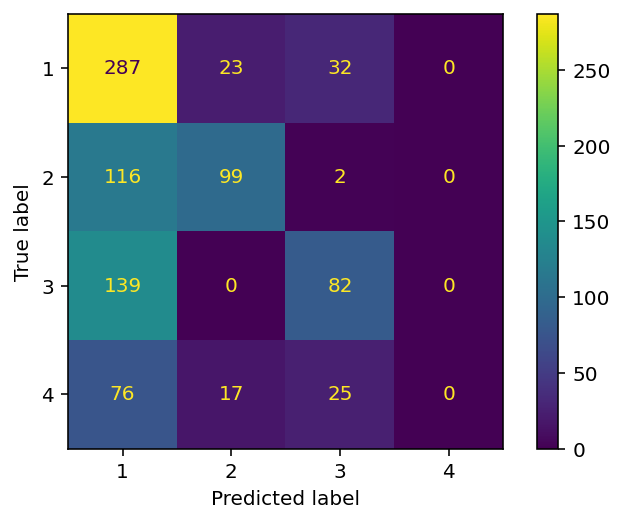

In [ ]:
# Test data:
get_results(MNBclf_filter, y_test, y_test_pred_mnb_filter)

<a name='Logistic regression'></a>

#### 1.2.3 RandomForestClassifier

In [ ]:
# Select K best features, change "num" to get the best results.
X_train_rf, X_test_rf, fs_rf = select_features(X_train1, y_train, X_test1, 37)

In [ ]:
#Use GridSearch to fine tune model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_filter = RandomForestClassifier()
tune_paragm = {
    'n_estimators': [10, 15],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [2, 3, 5]
}
rf_gdcv = GridSearchCV(rf_filter, tune_paragm, n_jobs=-1, cv=5, scoring='f1_macro')
rf_gdcv.fit(X_train_rf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 15]},
             scoring='f1_macro')

In [ ]:
# Get the best parameters
rf_gdcv.best_params_

# num=40:  'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 15 
# num=30:  'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 15 
# num=20:  'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 15 

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:
rf_filter_40 = RandomForestClassifier(n_estimators=15, max_depth=5, min_samples_split=3, min_samples_leaf=3, random_state=0) 
rf_filter_30 = RandomForestClassifier(n_estimators=15, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0) 
rf_filter_20 = RandomForestClassifier(n_estimators=15, max_depth=5, min_samples_split=2, min_samples_leaf=2, random_state=0) 
rf_filter = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=5, min_samples_leaf=3, random_state=0) 
rf_filter.fit(X_train_rf, y_train)
# Making predictions 
y_train_pred_rf_filter = rf_filter.predict(X_train_rf) #Training set
y_test_pred_rf_filter = rf_filter.predict(X_test_rf) #Test set

Classification report: 
               precision    recall  f1-score   support

           1       0.56      0.80      0.66      1366
           2       0.72      0.64      0.68       884
           3       0.67      0.65      0.66       863
           4       1.00      0.03      0.05       477

    accuracy                           0.62      3590
   macro avg       0.74      0.53      0.51      3590
weighted avg       0.68      0.62      0.58      3590



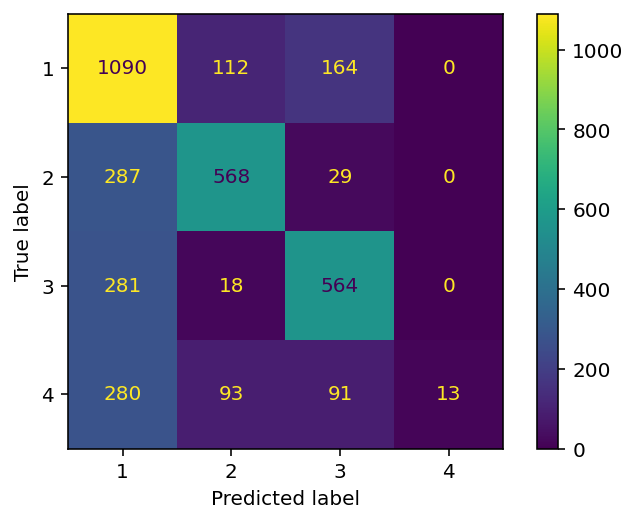

In [ ]:
# Train data:
get_results(rf_filter, y_train, y_train_pred_rf_filter)

Classification report: 
               precision    recall  f1-score   support

           1       0.52      0.74      0.61       342
           2       0.67      0.60      0.63       217
           3       0.59      0.57      0.58       221
           4       0.00      0.00      0.00       118

    accuracy                           0.57       898
   macro avg       0.44      0.48      0.46       898
weighted avg       0.50      0.57      0.53       898



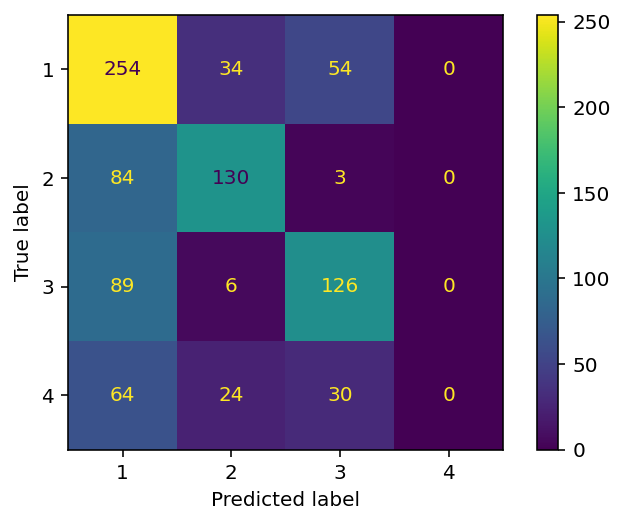

In [ ]:
# Test data:
get_results(rf_filter, y_test, y_test_pred_rf_filter)

<a name='Train'></a>

### 1.3 Model Training for regression without feature selection

In [ ]:
from sklearn.model_selection import train_test_split

X = df1.iloc[:,8:]
y = df1.iloc[:,5:8]

# Splitting the data into train and test sets after shuffling
# 80% 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
from sklearn.model_selection import KFold

def cross_validate(num_splits, X, Y, model):

  kf = KFold(n_splits=num_splits, shuffle= True, random_state=0)
  rmse_list = []

  for train_idx, test_idx in kf.split(X, Y):
    x_train = X.iloc[train_idx]
    y_train = Y.iloc[train_idx]

    x_test = X.iloc[test_idx]
    y_test = Y.iloc[test_idx]

    model.fit(x_train, y_train) #Training the model
    
    #Making Predictions
    y_pred = model.predict(x_test)

    #RMSE
    rmse_list.append(math.sqrt(mean_squared_error(y_test, y_pred)))

  return rmse_list

<a name='Linear regression'></a>

#### 1.3.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Fitting Linear Regression to training set
lr_val = LinearRegression()
lr_act = LinearRegression()
lr_dom = LinearRegression()

lr_val.fit(X_train, y_train.iloc[:,0])
lr_act.fit(X_train, y_train.iloc[:,1])
lr_dom.fit(X_train, y_train.iloc[:,2])

# Making predictions on train set
y_train_pred_lr_val = lr_val.predict(X_train)
y_train_pred_lr_act = lr_act.predict(X_train)
y_train_pred_lr_dom = lr_dom.predict(X_train)

# Making predictions on test set
y_test_pred_lr_val = lr_val.predict(X_test)
y_test_pred_lr_act = lr_act.predict(X_test)
y_test_pred_lr_dom = lr_dom.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Calculating RMSE for Linear Regression Model
# Valence
mse_train_lr_val = mean_squared_error(np.array(y_train)[:,0], y_train_pred_lr_val)
rmse_train_lr_val = math.sqrt(mse_train_lr_val)
mse_test_lr_val = mean_squared_error(np.array(y_test)[:,0], y_test_pred_lr_val)
rmse_test_lr_val = math.sqrt(mse_test_lr_val)
print("RMSE for valence on Train Set :",rmse_train_lr_val)
print("RMSE for valence on Test Set  :",rmse_test_lr_val, "\n")

# activation
mse_train_lr_act = mean_squared_error(np.array(y_train)[:,1], y_train_pred_lr_act)
rmse_train_lr_act = math.sqrt(mse_train_lr_act)
mse_test_lr_act = mean_squared_error(np.array(y_test)[:,1], y_test_pred_lr_act)
rmse_test_lr_act = math.sqrt(mse_test_lr_act)
print("RMSE for activation on Train Set :",rmse_train_lr_act)
print("RMSE for activation on Test Set  :",rmse_test_lr_act,"\n")

# dominance
mse_train_lr_dom = mean_squared_error(np.array(y_train)[:,2], y_train_pred_lr_dom)
rmse_train_lr_dom = math.sqrt(mse_train_lr_dom)
mse_test_lr_dom = mean_squared_error(np.array(y_test)[:,2], y_test_pred_lr_dom)
rmse_test_lr_dom = math.sqrt(mse_test_lr_dom)
print("RMSE for dominance on Train Set :",rmse_train_lr_dom)
print("RMSE for dominance on Test Set  :",rmse_test_lr_dom)

RMSE for valence on Train Set : 0.7641388955211681
RMSE for valence on Test Set  : 0.7644708178372567 

RMSE for activation on Train Set : 0.5338741945855096
RMSE for activation on Test Set  : 0.5307722414257542 

RMSE for dominance on Train Set : 0.6643803636275531
RMSE for dominance on Test Set  : 0.6725630923701066


In [ ]:
# 5-fold cross validation

rmse_cv_lr_val = cross_validate(5, X, y.iloc[:,0], lr_val)
print("RMSE for each fold of Linear Regression Model valence:  ",rmse_cv_lr_val)
print("Average RMSE for valence: ",np.mean(rmse_cv_lr_val), "\n")

rmse_cv_lr_act = cross_validate(5, X, y.iloc[:,1], lr_act)
print("RMSE for each fold of Linear Regression Model activation: ",rmse_cv_lr_act)
print("Average RMSE for activation:  ",np.mean(rmse_cv_lr_act), "\n")

rmse_cv_lr_dom= cross_validate(5, X, y.iloc[:,2], lr_dom)
print("RMSE for each fold of Linear Regression Model dominance",rmse_cv_lr_dom)
print("Average RMSE for dominance ",np.mean(rmse_cv_lr_dom))

RMSE for each fold of Linear Regression Model valence:   [0.7644708179748371, 0.776365490397218, 0.7730823338163348, 0.7674830543250798, 0.774184657648485]
Average RMSE for valence:  0.7711172708323909 

RMSE for each fold of Linear Regression Model activation:  [0.530772241437843, 0.533089467488893, 0.5496283890831462, 0.5274747791979602, 0.546614102622343]
Average RMSE for activation:   0.537515795966037 

RMSE for each fold of Linear Regression Model dominance [0.6725630923854174, 0.6545693016036981, 0.6789439437635842, 0.6736353466054265, 0.6743065596839569]
Average RMSE for dominance  0.6708036488084167


<a name='RandomForest regression'></a>

#### 1.3.2 RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fitting RandomForest Regression to training set
# Use the parameters from classification
rf_val = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0)
rf_act = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0)
rf_dom = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0)

rf_val.fit(X_train, y_train.iloc[:,0])
rf_act.fit(X_train, y_train.iloc[:,1])
rf_dom.fit(X_train, y_train.iloc[:,2])

# Making predictions on train set
y_train_pred_rf_val = rf_val.predict(X_train)
y_train_pred_rf_act = rf_act.predict(X_train)
y_train_pred_rf_dom = rf_dom.predict(X_train)

# Making predictions on test set
y_test_pred_rf_val = rf_val.predict(X_test)
y_test_pred_rf_act = rf_act.predict(X_test)
y_test_pred_rf_dom = rf_dom.predict(X_test)

In [ ]:
# Calculating RMSE for RandomForestRegressor
# Valence
mse_train_rf_val = mean_squared_error(np.array(y_train)[:,0], y_train_pred_rf_val)
rmse_train_rf_val = math.sqrt(mse_train_rf_val)
mse_test_rf_val = mean_squared_error(np.array(y_test)[:,0], y_test_pred_rf_val)
rmse_test_rf_val = math.sqrt(mse_test_rf_val)
print("RMSE for valence on Train Set :",rmse_train_rf_val)
print("RMSE for valence on Test Set  :",rmse_test_rf_val, "\n")

# activation
mse_train_rf_act = mean_squared_error(np.array(y_train)[:,1], y_train_pred_rf_act)
rmse_train_rf_act = math.sqrt(mse_train_rf_act)
mse_test_rf_act = mean_squared_error(np.array(y_test)[:,1], y_test_pred_rf_act)
rmse_test_rf_act = math.sqrt(mse_test_rf_act)
print("RMSE for activation on Train Set :",rmse_train_rf_act)
print("RMSE for activation on Test Set  :",rmse_test_rf_act,"\n")

# dominance
mse_train_rf_dom = mean_squared_error(np.array(y_train)[:,2], y_train_pred_rf_dom)
rmse_train_rf_dom = math.sqrt(mse_train_rf_dom)
mse_test_rf_dom = mean_squared_error(np.array(y_test)[:,2], y_test_pred_rf_dom)
rmse_test_rf_dom = math.sqrt(mse_test_rf_dom)
print("RMSE for dominance on Train Set :",rmse_train_rf_dom)
print("RMSE for dominance on Test Set  :",rmse_test_rf_dom)

RMSE for valence on Train Set : 0.7179955741607285
RMSE for valence on Test Set  : 0.7675082621223096 

RMSE for activation on Train Set : 0.5025693639332632
RMSE for activation on Test Set  : 0.5302704567346295 

RMSE for dominance on Train Set : 0.6236306086937533
RMSE for dominance on Test Set  : 0.6909415230676378


In [ ]:
# 5-fold cross validation

rmse_cv_rf_val = cross_validate(5, X, y.iloc[:,0], rf_val)
print("RMSE for each fold of RandomForestRegressor valence:  ",rmse_cv_rf_val)
print("Average RMSE for valence: ",np.mean(rmse_cv_rf_val), "\n")

rmse_cv_rf_act = cross_validate(5, X, y.iloc[:,1], rf_act)
print("RMSE for each fold of RandomForestRegressor activation: ",rmse_cv_rf_act)
print("Average RMSE for activation:  ",np.mean(rmse_cv_rf_act), "\n")

rmse_cv_rf_dom= cross_validate(5, X, y.iloc[:,2], rf_dom)
print("RMSE for each fold of RandomForestRegressor dominance",rmse_cv_rf_dom)
print("Average RMSE for dominance ",np.mean(rmse_cv_rf_dom))

RMSE for each fold of RandomForestRegressor valence:   [0.765669054834544, 0.7538445089995026, 0.7785569688358794, 0.7699226422318369, 0.7723943542767757]
Average RMSE for valence:  0.7680775058357077 

RMSE for each fold of RandomForestRegressor activation:  [0.5343691663258894, 0.5415231933063439, 0.5543519917186195, 0.5267709002717872, 0.5531900925907988]
Average RMSE for activation:   0.5420410688426878 

RMSE for each fold of RandomForestRegressor dominance [0.6876025445368465, 0.6574386383487968, 0.6725474808012628, 0.681024675917244, 0.6716821359685343]
Average RMSE for dominance  0.6740590951145369


<a name='SVM'></a>

#### 1.3.3 SVM

In [ ]:
from sklearn.svm import SVR

# Fitting Linear Regression to training set
svm_val = SVR(C=1.0, epsilon=0.2, kernel="rbf")
svm_act = SVR(C=1.0, epsilon=0.2, kernel="rbf")
svm_dom = SVR(C=1.0, epsilon=0.2, kernel="rbf")

svm_val.fit(X_train, y_train.iloc[:,0])
svm_act.fit(X_train, y_train.iloc[:,1])
svm_dom.fit(X_train, y_train.iloc[:,2])

# Making predictions on train set
y_train_pred_svm_val = svm_val.predict(X_train)
y_train_pred_svm_act = svm_act.predict(X_train)
y_train_pred_svm_dom = svm_dom.predict(X_train)

# Making predictions on test set
y_test_pred_svm_val = svm_val.predict(X_test)
y_test_pred_svm_act = svm_act.predict(X_test)
y_test_pred_svm_dom = svm_dom.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Calculating RMSE for SVM Model
# Valence
mse_train_svm_val = mean_squared_error(np.array(y_train)[:,0], y_train_pred_svm_val)
rmse_train_svm_val = math.sqrt(mse_train_svm_val)
mse_test_svm_val = mean_squared_error(np.array(y_test)[:,0], y_test_pred_svm_val)
rmse_test_svm_val = math.sqrt(mse_test_svm_val)
print("RMSE for valence on Train Set :",rmse_train_svm_val)
print("RMSE for valence on Test Set  :",rmse_test_svm_val, "\n")

# activation
mse_train_svm_act = mean_squared_error(np.array(y_train)[:,1], y_train_pred_svm_act)
rmse_train_svm_act = math.sqrt(mse_train_svm_act)
mse_test_svm_act = mean_squared_error(np.array(y_test)[:,1], y_test_pred_svm_act)
rmse_test_svm_act = math.sqrt(mse_test_svm_act)
print("RMSE for activation on Train Set :",rmse_train_svm_act)
print("RMSE for activation on Test Set  :",rmse_test_svm_act,"\n")

# dominance
mse_train_svm_dom = mean_squared_error(np.array(y_train)[:,2], y_train_pred_svm_dom)
rmse_train_svm_dom = math.sqrt(mse_train_svm_dom)
mse_test_svm_dom = mean_squared_error(np.array(y_test)[:,2], y_test_pred_svm_dom)
rmse_test_svm_dom = math.sqrt(mse_test_svm_dom)
print("RMSE for dominance on Train Set :",rmse_train_svm_dom)
print("RMSE for dominance on Test Set  :",rmse_test_svm_dom)

RMSE for valence on Train Set : 0.7127649225395585
RMSE for valence on Test Set  : 0.744086933439806 

RMSE for activation on Train Set : 0.49933529924927866
RMSE for activation on Test Set  : 0.5122466461309192 

RMSE for dominance on Train Set : 0.623862886080964
RMSE for dominance on Test Set  : 0.6620777454328295


In [ ]:
# 5-fold cross validation

rmse_cv_svm_val = cross_validate(5, X, y.iloc[:,0], svm_val)
print("RMSE for each fold of SVM valence:  ",rmse_cv_svm_val)
print("Average RMSE for valence: ",np.mean(rmse_cv_svm_val), "\n")

rmse_cv_svm_act = cross_validate(5, X, y.iloc[:,1], svm_act)
print("RMSE for each fold of SVM activation: ",rmse_cv_svm_act)
print("Average RMSE for activation:  ",np.mean(rmse_cv_svm_act), "\n")

rmse_cv_svm_dom= cross_validate(5, X, y.iloc[:,2], svm_dom)
print("RMSE for each fold of SVM dominance",rmse_cv_svm_dom)
print("Average RMSE for dominance ",np.mean(rmse_cv_svm_dom))

RMSE for each fold of SVM valence:   [0.7440914643838148, 0.7533712800941075, 0.748801038772028, 0.7450250974864912, 0.7397119313722813]
Average RMSE for valence:  0.7462001624217445 

RMSE for each fold of SVM activation:  [0.5122394303737429, 0.5142279522146369, 0.5347601995999366, 0.5291177897430305, 0.5318361818839842]
Average RMSE for activation:   0.5244363107630662 

RMSE for each fold of SVM dominance [0.6620672341376237, 0.6452914701598178, 0.6634587780073485, 0.6566238757932229, 0.6584826806440847]
Average RMSE for dominance  0.6571848077484196


<a name='Train'></a>

### 1.4 Model Training for regression with feature selection

Use Filter method to perform feature selection

In [ ]:
from sklearn.model_selection import train_test_split

X = df1.iloc[:,8:]
y = df1.iloc[:,5:8]

# Splitting the data into train and test sets after shuffling
# 80% 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
# Removing Constant features using VarianceThreshold

from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
constant_filter.fit_transform(X_train)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X_train.columns
                   if column not in X_train.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))
print(f'{len(constant_columns)} quasi-constant features were found.')


0
0 quasi-constant features were found.


In [ ]:
# Removing Quasi-Constant Features

qcons_filter = VarianceThreshold(threshold=0.01)

#Fitand transforming on train data
data_qcons = qcons_filter.fit_transform(X_train)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in X_train.columns
                    if column not in X_train.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(f'{len(qcons_columns)} quasi-constant features were found.')

#Removing identified quasi-constant columns
X_train1 = X_train.drop(qcons_columns,axis=1)
X_test1 = X_test.drop(qcons_columns,axis=1)
print(X_train1.shape)
print(X_test1.shape)

4 quasi-constant features were found.
(3590, 43)
(898, 43)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features_regression(X_train, y_train, X_test, num):
	# configure to select "num" features
	fs = SelectKBest(score_func=f_regression, k=num)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

<a name='Linear regression'></a>

#### 1.4.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math


## Valence

# Select K best features, change "num" to get the best results.
X_train_lr, X_test_lr, fs_lr = select_features_regression(X_train1, y_train.iloc[:, 0], X_test1, 33)

# Fitting Linear Regression to training set
lr_val_filter = LinearRegression()
lr_val_filter.fit(X_train_lr, y_train.iloc[:, 0])

# Making predictions 
y_train_pred_lr_val_filter = lr_val_filter.predict(X_train_lr) # Train set
y_test_pred_lr_val_filter = lr_val_filter.predict(X_test_lr) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_lr_val_filter = mean_squared_error(np.array(y_train)[:,0], y_train_pred_lr_val_filter)
rmse_train_lr_val_filter = math.sqrt(mse_train_lr_val_filter)
mse_test_lr_val_filter = mean_squared_error(np.array(y_test)[:,0], y_test_pred_lr_val_filter)
rmse_test_lr_val_filter = math.sqrt(mse_test_lr_val_filter)
print("RMSE for valence on Train Set :",rmse_train_lr_val_filter)
print("RMSE for valence on Test Set  :",rmse_test_lr_val_filter)

RMSE for valence on Train Set : 0.7798822471564282
RMSE for valence on Test Set  : 0.7756795670599167


In [ ]:
## Activation

# Select K best features, change "num" to get the best results.
X_train_lr, X_test_lr, fs_lr = select_features_regression(X_train1, y_train.iloc[:, 1], X_test1, 31)

# Fitting Linear Regression to training set
lr_act_filter = LinearRegression()
lr_act_filter.fit(X_train_lr, y_train.iloc[:, 1])

# Making predictions 
y_train_pred_lr_act_filter = lr_act_filter.predict(X_train_lr) # Train set
y_test_pred_lr_act_filter = lr_act_filter.predict(X_test_lr) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_lr_act_filter = mean_squared_error(np.array(y_train)[:,1], y_train_pred_lr_act_filter)
rmse_train_lr_act_filter = math.sqrt(mse_train_lr_act_filter)
mse_test_lr_act_filter = mean_squared_error(np.array(y_test)[:,1], y_test_pred_lr_act_filter)
rmse_test_lr_act_filter = math.sqrt(mse_test_lr_act_filter)
print("RMSE for Activation on Train Set :",rmse_train_lr_act_filter)
print("RMSE for Activation on Test Set  :",rmse_test_lr_act_filter)

RMSE for valence on Train Set : 0.5395322372670492
RMSE for valence on Test Set  : 0.5307171915395926


In [ ]:
## Dominance

# Select K best features, change "num" to get the best results.
X_train_lr, X_test_lr, fs_lr = select_features_regression(X_train1, y_train.iloc[:, 2], X_test1, 27)

# Fitting Linear Regression to training set
lr_dom_filter = LinearRegression()
lr_dom_filter.fit(X_train_lr, y_train.iloc[:, 2])

# Making predictions 
y_train_pred_lr_dom_filter = lr_dom_filter.predict(X_train_lr) # Train set
y_test_pred_lr_dom_filter = lr_dom_filter.predict(X_test_lr) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_lr_dom_filter = mean_squared_error(np.array(y_train)[:,2], y_train_pred_lr_dom_filter)
rmse_train_lr_dom_filter = math.sqrt(mse_train_lr_dom_filter)
mse_test_lr_dom_filter = mean_squared_error(np.array(y_test)[:,2], y_test_pred_lr_dom_filter)
rmse_test_lr_dom_filter = math.sqrt(mse_test_lr_dom_filter)
print("RMSE for Dominance on Train Set :",rmse_train_lr_dom_filter)
print("RMSE for Dominance on Test Set  :",rmse_test_lr_dom_filter)

RMSE for Dominance on Train Set : 0.671583019256425
RMSE for Dominance on Test Set  : 0.6760101979239266


<a name='RandomForest regression'></a>

#### 1.4.2 RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math


## Valence

# Select K best features, change "num" to get the best results.
X_train_rf, X_test_rf, fs_rf = select_features_regression(X_train1, y_train.iloc[:, 0], X_test1, 27)

# Fitting Linear Regression to training set
rf_val_filter = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0)
rf_val_filter.fit(X_train_rf, y_train.iloc[:, 0])

# Making predictions 
y_train_pred_rf_val_filter = rf_val_filter.predict(X_train_rf) # Train set
y_test_pred_rf_val_filter = rf_val_filter.predict(X_test_rf) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_rf_val_filter = mean_squared_error(np.array(y_train)[:,0], y_train_pred_rf_val_filter)
rmse_train_rf_val_filter = math.sqrt(mse_train_rf_val_filter)
mse_test_rf_val_filter = mean_squared_error(np.array(y_test)[:,0], y_test_pred_rf_val_filter)
rmse_test_rf_val_filter = math.sqrt(mse_test_rf_val_filter)
print("RMSE for valence on Train Set :",rmse_train_rf_val_filter)
print("RMSE for valence on Test Set  :",rmse_test_rf_val_filter)

RMSE for valence on Train Set : 0.7275441326352806
RMSE for valence on Test Set  : 0.7668906675484437


In [ ]:
## Activation

# Select K best features, change "num" to get the best results.
X_train_rf, X_test_rf, fs_rf = select_features_regression(X_train1, y_train.iloc[:, 1], X_test1, 30)

# Fitting Linear Regression to training set
rf_act_filter = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0)
rf_act_filter.fit(X_train_rf, y_train.iloc[:, 1])

# Making predictions 
y_train_pred_rf_act_filter = rf_act_filter.predict(X_train_rf) # Train set
y_test_pred_rf_act_filter = rf_act_filter.predict(X_test_rf) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_rf_act_filter = mean_squared_error(np.array(y_train)[:,1], y_train_pred_rf_act_filter)
rmse_train_rf_act_filter = math.sqrt(mse_train_rf_act_filter)
mse_test_rf_act_filter = mean_squared_error(np.array(y_test)[:,1], y_test_pred_rf_act_filter)
rmse_test_rf_act_filter = math.sqrt(mse_test_rf_act_filter)
print("RMSE for Activation on Train Set :",rmse_train_rf_act_filter)
print("RMSE for Activation on Test Set  :",rmse_test_rf_act_filter)

RMSE for Activation on Train Set : 0.5068872858012552
RMSE for Activation on Test Set  : 0.537974385723258


In [ ]:
## Dominance

# Select K best features, change "num" to get the best results.
X_train_rf, X_test_rf, fs_lr = select_features_regression(X_train1, y_train.iloc[:, 2], X_test1, 26)

# Fitting Linear Regression to training set
rf_dom_filter = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0)
rf_dom_filter.fit(X_train_rf, y_train.iloc[:, 2])

# Making predictions 
y_train_pred_rf_dom_filter = rf_dom_filter.predict(X_train_rf) # Train set
y_test_pred_rf_dom_filter = rf_dom_filter.predict(X_test_rf) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_rf_dom_filter = mean_squared_error(np.array(y_train)[:,2], y_train_pred_rf_dom_filter)
rmse_train_rf_dom_filter = math.sqrt(mse_train_rf_dom_filter)
mse_test_rf_dom_filter = mean_squared_error(np.array(y_test)[:,2], y_test_pred_rf_dom_filter)
rmse_test_rf_dom_filter = math.sqrt(mse_test_rf_dom_filter)
print("RMSE for Dominance on Train Set :",rmse_train_rf_dom_filter)
print("RMSE for Dominance on Test Set  :",rmse_test_rf_dom_filter)

RMSE for Dominance on Train Set : 0.6299720986798837
RMSE for Dominance on Test Set  : 0.6908775957614052


<a name='SVM'></a>

#### 1.4.3 SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math


## Valence

# Select K best features, change "num" to get the best results.
X_train_svm, X_test_svm, fs_svm = select_features_regression(X_train1, y_train.iloc[:, 0], X_test1, 19)

# Fitting Linear Regression to training set
svm_val_filter = SVR(C=1.0, epsilon=0.2, kernel="rbf")
svm_val_filter.fit(X_train_svm, y_train.iloc[:, 0])

# Making predictions 
y_train_pred_svm_val_filter = svm_val_filter.predict(X_train_svm) # Train set
y_test_pred_svm_val_filter = svm_val_filter.predict(X_test_svm) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_svm_val_filter = mean_squared_error(np.array(y_train)[:,0], y_train_pred_svm_val_filter)
rmse_train_svm_val_filter = math.sqrt(mse_train_svm_val_filter)
mse_test_svm_val_filter = mean_squared_error(np.array(y_test)[:,0], y_test_pred_svm_val_filter)
rmse_test_svm_val_filter = math.sqrt(mse_test_svm_val_filter)
print("RMSE for valence on Train Set :",rmse_train_svm_val_filter)
print("RMSE for valence on Test Set  :",rmse_test_svm_val_filter)

RMSE for valence on Train Set : 0.7186999543778186
RMSE for valence on Test Set  : 0.7466622385159901


In [ ]:
## Activation

# Select K best features, change "num" to get the best results.
X_train_svm, X_test_svm, fs_svm = select_features_regression(X_train1, y_train.iloc[:, 1], X_test1, 35)

# Fitting Linear Regression to training set
svm_act_filter = SVR(C=1.0, epsilon=0.2, kernel="rbf")
svm_act_filter.fit(X_train_svm, y_train.iloc[:, 1])

# Making predictions 
y_train_pred_svm_act_filter = svm_act_filter.predict(X_train_svm) # Train set
y_test_pred_svm_act_filter = svm_act_filter.predict(X_test_svm) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_svm_act_filter = mean_squared_error(np.array(y_train)[:,1], y_train_pred_svm_act_filter)
rmse_train_svm_act_filter = math.sqrt(mse_train_svm_act_filter)
mse_test_svm_act_filter = mean_squared_error(np.array(y_test)[:,1], y_test_pred_svm_act_filter)
rmse_test_svm_act_filter = math.sqrt(mse_test_svm_act_filter)
print("RMSE for Activation on Train Set :",rmse_train_svm_act_filter)
print("RMSE for Activation on Test Set  :",rmse_test_svm_act_filter)

RMSE for Activation on Train Set : 0.503173072806024
RMSE for Activation on Test Set  : 0.514131261622271


In [ ]:
## Dominance

# Select K best features, change "num" to get the best results.
X_train_svm, X_test_svm, fs_svm = select_features_regression(X_train1, y_train.iloc[:, 2], X_test1, 33)

# Fitting Linear Regression to training set
svm_dom_filter = SVR(C=1.0, epsilon=0.2, kernel="rbf")
svm_dom_filter.fit(X_train_svm, y_train.iloc[:, 2])

# Making predictions 
y_train_pred_svm_dom_filter = svm_dom_filter.predict(X_train_svm) # Train set
y_test_pred_svm_dom_filter = svm_dom_filter.predict(X_test_svm) # Test set

# Calculating RMSE for Linear Regression Model
mse_train_svm_dom_filter = mean_squared_error(np.array(y_train)[:,2], y_train_pred_svm_dom_filter)
rmse_train_svm_dom_filter = math.sqrt(mse_train_svm_dom_filter)
mse_test_svm_dom_filter = mean_squared_error(np.array(y_test)[:,2], y_test_pred_svm_dom_filter)
rmse_test_svm_dom_filter = math.sqrt(mse_test_svm_dom_filter)
print("RMSE for Dominance on Train Set :",rmse_train_svm_dom_filter)
print("RMSE for Dominance on Test Set  :",rmse_test_svm_dom_filter)

RMSE for Dominance on Train Set : 0.6290610345241009
RMSE for Dominance on Test Set  : 0.6578426829738065
